In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import tensorflow as tf
from tensorflow.keras import models, layers, Sequential
import pandas as pd

In [172]:
raw_data = pd.read_csv('face_data.csv')

In [173]:
raw_data.describe(include = 'all')

,emotion,Usage,pixels
count,35887.000000,35887,35887
unique,NaN,3,34034
top,NaN,Training,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
freq,NaN,28709,12
mean,3.323265,NaN,NaN
std,1.873819,NaN,NaN
min,0.000000,NaN,NaN
25%,2.000000,NaN,NaN
50%,3.000000,NaN,NaN
75%,5.000000,NaN,NaN


In [177]:
print(raw_data['emotion'].value_counts())


3    8989
6    6198
4    6077
2    5121
0    4953
5    4002
1     547
Name: emotion, dtype: int64


In [181]:
raw_data

,emotion,Usage,pixels
0,0,Training,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,Training,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,Training,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,Training,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,Training,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...
...,...,...,...
35882,6,PrivateTest,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...
35883,3,PrivateTest,178 174 172 173 181 188 191 194 196 199 200 20...
35884,0,PrivateTest,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...
35885,3,PrivateTest,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...


In [183]:
test_data = raw_data[raw_data["Usage"]=="PrivateTest"]

KeyError: 'Usage'

In [89]:
new_data = raw_data[raw_data['emotion'] == 1]

In [90]:
new_data = pd.concat([new_data] * 7, ignore_index = True)

In [93]:
data = pd.concat([raw_data, new_data], ignore_index = True)

In [95]:
data['emotion'].value_counts()

3    7215
6    4965
4    4830
2    4097
0    3995
1    3488
5    3171
Name: emotion, dtype: int64

In [98]:
data.reset_index(drop = True)

,emotion,pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...
...,...,...
31756,1,41 38 40 34 29 39 34 50 109 184 220 231 233 23...
31757,1,53 64 78 81 81 81 80 79 78 77 78 80 82 85 87 9...
31758,1,2 0 85 139 197 220 219 225 229 231 232 230 225...
31759,1,22 20 18 21 38 48 55 58 59 66 73 84 93 94 91 8...


In [101]:
from sklearn.utils import shuffle

In [103]:
data = shuffle(data)

In [107]:
data.reset_index(inplace = True, drop = True)
data

,emotion,pixels
0,1,58 53 22 12 10 18 33 48 58 74 78 99 125 116 14...
1,3,20 26 23 24 26 29 30 28 27 17 60 90 97 104 109...
2,1,192 163 153 109 130 121 91 87 115 112 76 57 46...
3,3,52 30 22 16 25 48 36 32 37 44 65 91 110 121 14...
4,3,67 145 182 143 111 98 84 64 51 41 46 75 87 76 ...
...,...,...
31756,4,125 126 125 125 122 114 123 124 126 128 111 11...
31757,2,250 250 250 250 250 253 214 188 171 117 95 79 ...
31758,5,252 255 211 106 86 89 77 110 143 156 168 183 1...
31759,5,59 47 44 71 60 74 69 73 68 63 52 65 66 70 69 5...


In [110]:
data['pixels'] = data['pixels'].apply(lambda im: np.fromstring(im, sep = ' '))

In [111]:
data['pixels'][0]

array([58., 53., 22., ..., 96., 59., 38.])

In [112]:
xtrain = np.vstack(data['pixels'])

In [113]:
xtrain.shape

(31761, 2304)

In [114]:
ytrain = np.array(data['emotion'])
ytrain.shape

(31761,)

In [115]:
xtrain = xtrain.reshape(-1, 48, 48, 1)
xtrain.shape

(31761, 48, 48, 1)

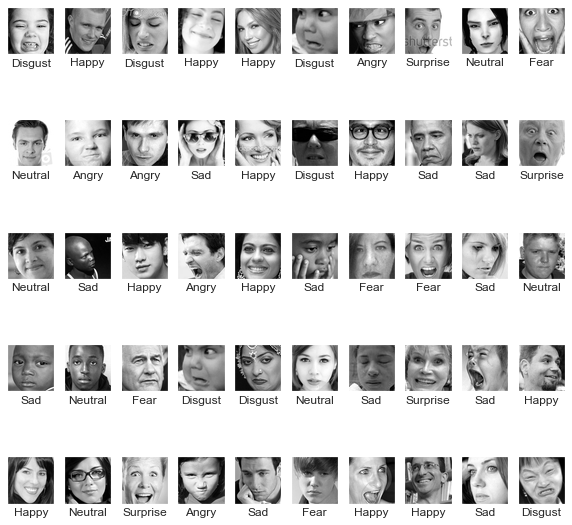

In [124]:
label = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

plt.figure(figsize = (10, 10))
for i in range(50):
    x = 0
    plt.subplot(5, 10, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(xtrain[i,:,:,0], cmap = 'gray')
    plt.xlabel(label[ytrain[i]])
    
plt.show()

In [121]:
xtrain = xtrain/255.

In [123]:
xtrain.shape

(31761, 48, 48, 1)

In [129]:
validation_inputs = xtrain[:3000,:,:,:]
validation_targets = ytrain[:3000]

train_inputs = xtrain[3000:,:,:,:]
train_targets = ytrain[3000:]

print(validation_inputs.shape)
print(validation_targets.shape)
print(train_inputs.shape)
print(train_targets.shape)

(3000, 48, 48, 1)
(3000,)
(28761, 48, 48, 1)
(28761,)


In [130]:
test_data = pd.read_csv('face_test.csv')

In [132]:
test_data

,pixels
0,254 254 254 254 254 249 255 160 2 58 53 70 77 ...
1,156 184 198 202 204 207 210 212 213 214 215 21...
2,69 118 61 60 96 121 103 87 103 88 70 90 115 12...
3,205 203 236 157 83 158 120 116 94 86 155 180 2...
4,87 79 74 66 74 96 77 80 80 84 83 89 102 91 84 ...
...,...
7173,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...
7174,178 174 172 173 181 188 191 194 196 199 200 20...
7175,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...
7176,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...


In [133]:
test_data['pixels'] = test_data['pixels'].apply(lambda m: np.fromstring(m, sep = ' '))

In [134]:
test_data['pixels'][0]

array([254., 254., 254., ...,  42., 129., 180.])

In [135]:
test_inputs = np.vstack(test_data['pixels'])

In [136]:
test_inputs.shape

(7178, 2304)

In [139]:
test_inputs = test_inputs.reshape(-1, 48, 48, 1)

test_inputs.shape

(7178, 48, 48, 1)

In [140]:
test_inputs /= 255.

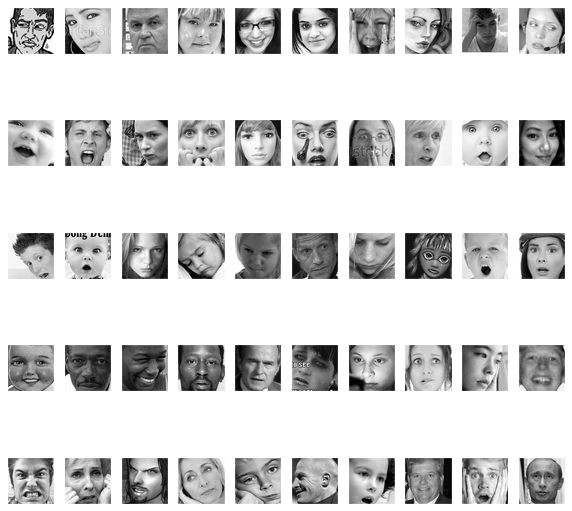

In [141]:
label = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

plt.figure(figsize = (10, 10))
for i in range(50):
    x = 0
    plt.subplot(5, 10, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_inputs[i,:,:,0], cmap = 'gray')
    
plt.show()

In [155]:
#model = Sequential([
    
    layers.Conv2D(64, (3, 3), activation = 'relu', padding = 'same', input_shape = (48, 48, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation = 'relu', padding = 'same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation = 'relu', padding = 'same'),
    
    layers.Flatten(),
    layers.Dense(512, activation = 'relu'),
    layers.Dense(512, activation = 'relu'),
    layers.Dense(512, activation = 'relu'),
    layers.Dense(7, activation = 'softmax')
    
    
])

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 48, 48, 64)        640       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 24, 24, 128)       73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 12, 12, 128)       0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 12, 12, 256)       295168    
_________________________________________________________________
flatten_5 (Flatten)          (None, 36864)             0         
_________________________________________________________________
dense_20 (Dense)             (None, 512)              

In [156]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [157]:
max_epochs = 7

batch_size = 100

model.fit(train_inputs, train_targets, validation_data = (validation_inputs, validation_targets), epochs = max_epochs, batch_size = batch_size)

Train on 28761 samples, validate on 3000 samples
Epoch 1/7
28761/28761 [==============================] - 638s 22ms/sample - loss: 1.7217 - accuracy: 0.3270 - val_loss: 1.4815 - val_accuracy: 0.4353
Epoch 2/7
28761/28761 [==============================] - 618s 21ms/sample - loss: 1.3060 - accuracy: 0.5002 - val_loss: 1.1829 - val_accuracy: 0.5403
Epoch 3/7
28761/28761 [==============================] - 772s 27ms/sample - loss: 1.0667 - accuracy: 0.5883 - val_loss: 1.1201 - val_accuracy: 0.5770
Epoch 4/7
28761/28761 [==============================] - 585s 20ms/sample - loss: 0.8934 - accuracy: 0.6615 - val_loss: 1.1233 - val_accuracy: 0.5877
Epoch 5/7
28761/28761 [==============================] - 611s 21ms/sample - loss: 0.7007 - accuracy: 0.7406 - val_loss: 1.1342 - val_accuracy: 0.6017
Epoch 6/7
28761/28761 [==============================] - 758s 26ms/sample - loss: 0.4937 - accuracy: 0.8233 - val_loss: 1.3286 - val_accuracy: 0.6013
Epoch 7/7
28761/28761 [============================

In [161]:
predictions = model.predict(test_inputs)

In [162]:
predictions = predictions.round(2)
predictions

array([[0.76, 0.  , 0.01, ..., 0.1 , 0.  , 0.12],
       [0.72, 0.03, 0.  , ..., 0.  , 0.  , 0.  ],
       [0.24, 0.  , 0.04, ..., 0.23, 0.  , 0.49],
       ...,
       [0.02, 0.  , 0.  , ..., 0.55, 0.  , 0.42],
       [0.37, 0.  , 0.02, ..., 0.13, 0.  , 0.3 ],
       [0.  , 0.  , 0.98, ..., 0.01, 0.  , 0.  ]], dtype=float32)

In [163]:
out = pd.DataFrame(predictions)

In [164]:
out

,0,1,2,3,4,5,6
0,0.76,0.00,0.01,0.00,0.10,0.00,0.12
1,0.72,0.03,0.00,0.24,0.00,0.00,0.00
2,0.24,0.00,0.04,0.00,0.23,0.00,0.49
3,0.00,0.00,0.08,0.30,0.02,0.00,0.60
4,0.00,0.00,0.00,1.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...
7173,0.01,0.00,0.00,0.00,0.01,0.00,0.97
7174,0.01,0.00,0.95,0.00,0.03,0.01,0.00
7175,0.02,0.00,0.00,0.01,0.55,0.00,0.42
7176,0.37,0.00,0.02,0.18,0.13,0.00,0.30


In [167]:
output = out.idxmax(axis = 1)

In [169]:
type(output)

pandas.core.series.Series

In [170]:
model_jason = model.to_jason()
with open("face_model.json", "w") as json_file:
    json_file.write(model_json)

AttributeError: 'Sequential' object has no attribute 'to_jason'